# Example notebook for groupwise registration using GreedyFHist

### Step 1: Loading image data

GreedyFHist has some utility functions for load image data, but ultimately the only requirement is that image data can be converted to a `numpy.array`.

In [1]:
import matplotlib.pyplot as plt

from greedyfhist.data_types import Image
from greedyfhist.registration import GreedyFHist
from greedyfhist.options import RegistrationOptions

In [2]:
image_path1 = '../groupwise_examples/hes.tif'
image_path2 = '../groupwise_examples/mts.tif'
image_path3 = '../groupwise_examples/ihc.tif'

In [3]:
image1 = Image.load_from_path(image_path1)
image2 = Image.load_from_path(image_path2)
image3 = Image.load_from_path(image_path3)

Text(0.5, 1.0, 'IHC')

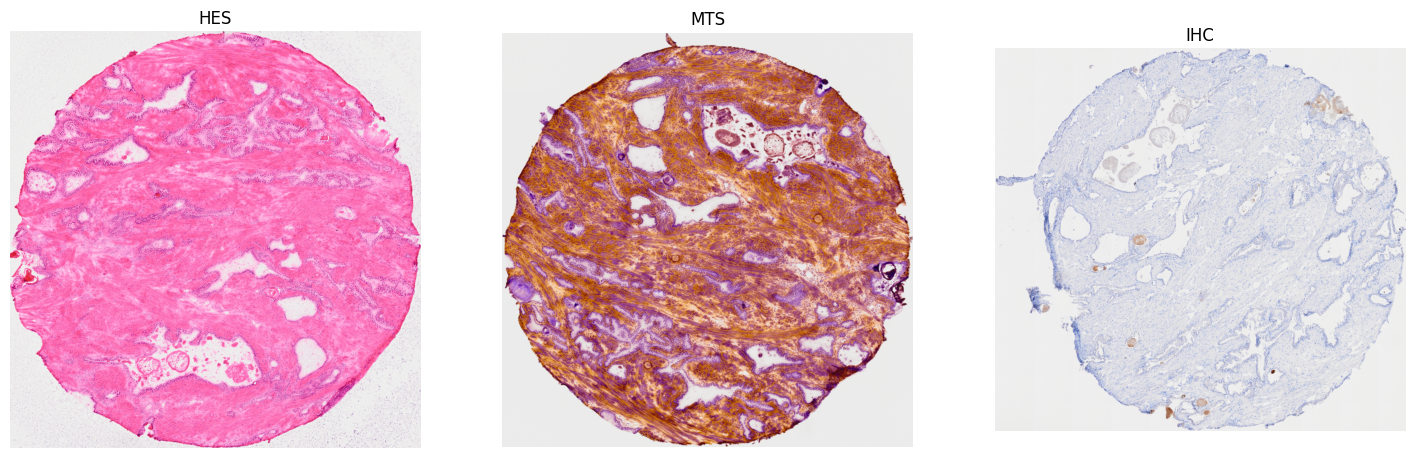

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for ax in axs:
    ax.axis('off')
axs[0].imshow(image1.data)
axs[0].set_title('HES')
axs[1].imshow(image2.data)
axs[1].set_title('MTS')
axs[2].imshow(image3.data)
axs[2].set_title('IHC')

### Step 2: Groupwise Registration

For the groupwise registration an ordered list of images needs be used. The result is a groupwise_registration_result which contains affine and nonrigid transformations from all moving image spaces to fixed image spaces.

In [5]:
options = RegistrationOptions()
options.affine_registration_options.n_threads = 8
options.nonrigid_registration_options.n_threads = 8

registerer = GreedyFHist.load_from_config()

In [6]:
# For groupwise registration we need to extract an ordered list of images.
# This list can either be a list of images or a list of tuple of shape (image, mask).

img_list = [image1.data, image2.data, image3.data]

In [7]:
groupwise_registration_result, _ = registerer.groupwise_registration(img_list, options=options)

After groupwise registration, we receive an object of type GroupwiseRegistrationResult that contains a pairwise list of affine registrations and nonrigid registrations between affinely transformed moving images and the fixed image.

In [8]:
# For getting the registration of any moving to the fixed image we can use the get_transforms method.
# image1_to_image3_transform and image2_to_image3_transform can be used the same way as transformations from the pairwise transform.

image1_to_image3_transform = groupwise_registration_result.get_transforms(0)
image2_to_image3_transform = groupwise_registration_result.get_transforms(1)

### Step 3: Transform to fixed image spaces.

In [11]:
warped_image1 = registerer.transform_image(image1.data, image1_to_image3_transform.registration.forward_transform, 'LINEAR')
warped_image2 = registerer.transform_image(image2.data, image2_to_image3_transform.registration.forward_transform, 'LINEAR')

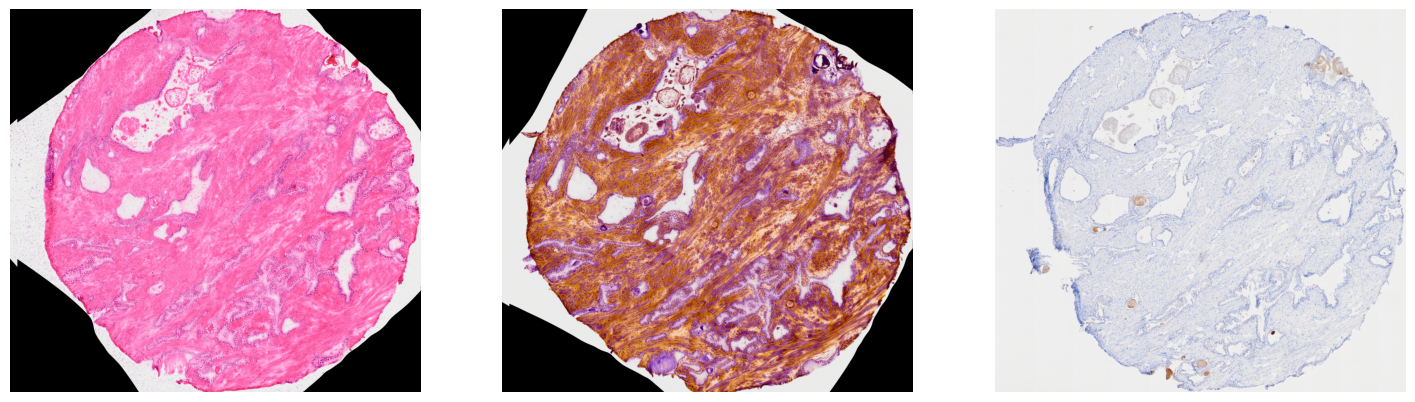

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for ax in axs:
    ax.axis('off')
axs[0].imshow(warped_image1)
axs[1].imshow(warped_image2)
axs[2].imshow(image3.data)